In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import scipy.linalg as linalg
from pprint import pprint

import matplotlib.gridspec as gridspec
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import sys
import os
import copy
import string
import glob
import xarray as xr 

import warnings

## Modules

In [5]:
from custom_functions import *

# Practice 5 Q1c

## Define map

In [6]:
def f(x,a,b):
    f1 = np.exp(-a*x**2)+b
    return f1

## $\alpha = 5$

In [20]:
# set parameters
a = 5;
x0 = 0.1;
b_vals = np.linspace(-1,1,201);

# set number of iterations
Nsteps = 5000;

In [21]:
# create empty solution vector 
xtraj = np.empty((1,Nsteps+1));
xtraj[:] = np.nan

# input initial condition
xtraj[:,0] = x0;

### Define tangent space function

In [22]:
tan_func = lambda x,a: -2*x*a*np.exp(-a*x**2)
logdf = lambda x,a: np.log(abs(tan_func(x,a)))

### Plot Lyap exp for varying $\beta$

C:\Users\quinncr\AppData\Local\Temp\ipykernel_20380\1950247447.py:2: RuntimeWarning: divide by zero encountered in log
  logdf = lambda x,a: np.log(abs(tan_func(x,a)))


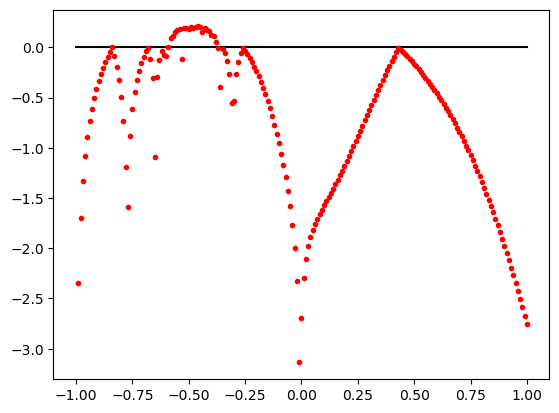

In [27]:
Lyaps = np.empty((b_vals.shape[0],1))
Lyaps[:] = np.nan

for j in np.arange(0,b_vals.shape[0]):
    b = b_vals[j]
    x0 = 0.1;
    
    # create empty solution vector 
    xtraj = np.empty((Nsteps+1))
    xtraj[:] = np.nan

    # input initial condition
    xtraj[0] = x0;
    
    # iterate map
    for i in np.arange(0,Nsteps):
        x0 = f(x0,a,b)
        xtraj[i+1] = x0

    Lyap = np.mean(logdf(xtraj,a))

    Lyaps[j] = Lyap;


plt.plot([b_vals[0],b_vals[-1]],[0,0],color='k')
plt.plot(b_vals,Lyaps,'r.')